# 1. 
* 试着用pytorch做一个线性模型
        

In [8]:
import jieba 
import gensim
import numpy as np
import sklearn
import torch
from torch import nn
from sklearn.metrics import f1_score
import torch.nn.functional as F

In [2]:
from batch_size import datasets
from torch.utils.data import Dataset, DataLoader
from preprocess import pre_train
import config as c
word2vec_model=gensim.models.KeyedVectors.load_word2vec_format(c.word2vec_file)
load_word=pre_train()
data=load_word.load_word()

In [3]:
def get_data(idx):
    '''
    就是把数据传入啊
    '''
    q1=np.zeros((len(idx),128))
    q2=np.zeros((len(idx),128))    
    for i,j in enumerate(idx):        
        q1[i]=transform_word_vector(data['q1'][j-1])
        q2[i]=transform_word_vector(data['q2'][j-1])        
    target=np.array([data['target'][i-1] for i in idx])
    return q1,q2,target 

def transform_word_vector(word_lists):
    '''
    分好词的句子的列表
    '''
    re=np.zeros((len(word_lists),128))
    for i,word in enumerate(word_lists):
        try:
            re[i]=word2vec_model[word]
        except:
            pass 
    return re.mean(axis=0)

In [4]:
dataset=datasets()
datas=DataLoader(dataset,batch_size=40000)

### 2. linear

In [89]:
H,D_in,D_out=100,256,2
#模型
model =nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, 1),
)
#损失函数，
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-1)
epochs=50

for epoch in range(epochs):
    for i,idx in enumerate(datas):
        q1,q2,train_y=get_data(idx.numpy())
        train_x=np.hstack([q1,q2])
        inputs=torch.from_numpy(train_x).float()
        labels=torch.tensor(train_y.reshape(-1,1)).float()
        y_pred=model(inputs)        
        loss=loss_fn(y_pred,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch%2==0 and i%2==0:
            print(epoch,i,loss.item()) 
    

0 0 0.6807497143745422
0 2 0.650222897529602
2 0 0.6184453964233398
2 2 0.5838286280632019
4 0 0.5797279477119446
4 2 0.5389785170555115
6 0 0.5549947023391724
6 2 0.5079677700996399
8 0 0.5397979021072388
8 2 0.48688510060310364
10 0 0.5310871005058289
10 2 0.47291067242622375
12 0 0.5265048742294312
12 2 0.46382176876068115
14 0 0.5243455171585083
14 2 0.4579561948776245
16 0 0.5234938859939575
16 2 0.45416200160980225
18 0 0.5232869982719421
18 2 0.45168399810791016
20 0 0.5233615040779114
20 2 0.4500429928302765
22 0 0.5235329270362854
22 2 0.44893887639045715
24 0 0.5237155556678772
24 2 0.44818446040153503
26 0 0.5238748788833618
26 2 0.4476613402366638
28 0 0.5240008234977722
28 2 0.44729354977607727
30 0 0.5240942239761353
30 2 0.4470313787460327
32 0 0.5241599082946777
32 2 0.4468419551849365
34 0 0.5242034792900085
34 2 0.44670307636260986
36 0 0.5242300629615784
36 2 0.4465996026992798
38 0 0.524243950843811
38 2 0.4465210437774658
40 0 0.5242483615875244
40 2 0.446460127830

* 当成线性的测试

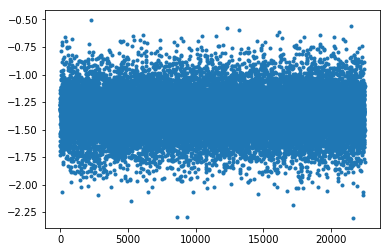

In [77]:
import matplotlib.pyplot as plt
plt.plot(y.numpy(),'.')
#plt.plot(train_y)
plt.show()


In [73]:
y.mean()

tensor(-1.3477)

* 分类问题的评估模型

# 训练不出来

* 保存和加载模型

In [ ]:
# 保存和加载整个模型
torch.save(model_object, 'model.pkl')
model = torch.load('model.pkl')

In [ ]:
# 仅保存和加载模型参数(推荐使用)
torch.save(model_object.state_dict(), 'params.pkl')
model_object.load_state_dict(torch.load('params.pkl'))